In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
from datetime import datetime

In [ ]:
filepath = "/content/supermarket_sales - Sheet1.csv"
data = pd.read_csv(filepath)
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# data.describe()
data.describe(include= "O") # for object data types

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,545-46-3100,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [83]:
data.isnull().sum()

City                       0
Customer type              0
Gender                     0
Product line               0
Quantity                   0
Total                      0
Payment                    0
gross margin percentage    0
Rating                     0
Month                      0
weekday                    0
Purchase_Hour              0
dtype: int64

We can see that we have no missing data in out dataframe and each datatype is in alignment with what is expected from the table aside from date and time.

Therefore, we can proceed to parse our date and time. We might also want to correlate some of the columns 

## Datetime Parser

In [ ]:
data["Date"] = pd.to_datetime(data.Date, format= '%m/%d/%Y')
data["Month"] = data["Date"].dt.strftime('%B') # Small case for abbreviation
# data["Weekday"] = data["Date"].dt.strftime
# .dt.strftime('%b-%Y')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February


In [ ]:
# day_of_week={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
# data['weekday'] = data['Date'].dt.dayofweek.map(day_of_week)
data['weekday'] = data['Date'].apply(lambda x: datetime.strftime(x, '%A'))
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,Friday


In [ ]:
data["Purchase_Hour"] = pd.to_datetime(data["Time"], format= '%H:%M').dt.hour
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,weekday,Purchase_Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,Friday,10


Before we drop the Date and Time Column, let us quickly check through the correlations

## Correlation
Some columns are too similar so its important to dig deep into how correlated they are so as to avoid unnecessary (repeated) analysis

In [ ]:
np.corrcoef(data['Tax 5%'], data['gross income'])

array([[1., 1.],
       [1., 1.]])

In [ ]:
np.corrcoef(data['Total'], data['Tax 5%'])

array([[1., 1.],
       [1., 1.]])

In [ ]:
np.corrcoef(data['cogs'], data['Tax 5%'])

array([[1., 1.],
       [1., 1.]])

In [ ]:
np.corrcoef(data['Total'], data['Tax 5%'])

array([[1., 1.],
       [1., 1.]])

In [ ]:
np.corrcoef(data['Unit price'], data['Tax 5%'])

array([[1.        , 0.63396209],
       [0.63396209, 1.        ]])

In [ ]:
np.corrcoef(data['Quantity'], data['Tax 5%'])

array([[1.        , 0.70551019],
       [0.70551019, 1.        ]])

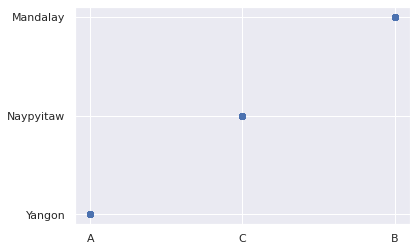

In [ ]:
sns.set_theme()
plt.scatter(x = 'Branch', y = 'City', data = data);

We can see that the number of branches is equal to the number of Cities, and each branch corresponds to one city. Also, as anticipated, some of these columns are perfectly correlated. This is an example of repetitive data we try to avoid in modelling to avoid bias. Therefore, we will get rid of any one of these columns before visualization and Model Training.

## Feature Reduction

In [ ]:
data["gross margin percentage"].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

we can see that the Gross Margin Profit Percentage is the same through the entire comodity and hence it can also be dropped from visualization and Modelling

In [ ]:
col_to_drop = ["Date", "Time", "Tax 5%", "cogs", "gross income", "Unit price", "Branch", "Date", "Time", "Invoice ID"]
data.drop(col_to_drop, axis=1, inplace=True)

In [ ]:
data.head()

,City,Customer type,Gender,Product line,Quantity,Total,Payment,gross margin percentage,Rating,Month,weekday,Purchase_Hour
0,Yangon,Member,Female,Health and beauty,7,548.9715,Ewallet,4.761905,9.1,January,Saturday,13
1,Naypyitaw,Normal,Female,Electronic accessories,5,80.2200,Cash,4.761905,9.6,March,Friday,10
2,Yangon,Normal,Male,Home and lifestyle,7,340.5255,Credit card,4.761905,7.4,March,Sunday,13
3,Yangon,Member,Male,Health and beauty,8,489.0480,Ewallet,4.761905,8.4,January,Sunday,20
4,Yangon,Normal,Male,Sports and travel,7,634.3785,Ewallet,4.761905,5.3,February,Friday,10


## Visualization

Now for visualization, we will break our data down into 3 main groups (sub-data)



### Month Grouping

In [ ]:
monthly_sales= data.groupby("Month")
January = monthly_sales.get_group("January")
Febuary = monthly_sales.get_group("February")
March = monthly_sales.get_group("March")
January.head()

,City,Customer type,Gender,Product line,Quantity,Total,Payment,gross margin percentage,Rating,Month,weekday,Purchase_Hour
0,Yangon,Member,Female,Health and beauty,7,548.9715,Ewallet,4.761905,9.1,January,Saturday,13
3,Yangon,Member,Male,Health and beauty,8,489.0480,Ewallet,4.761905,8.4,January,Sunday,20
8,Yangon,Member,Female,Health and beauty,2,76.1460,Credit card,4.761905,7.2,January,Thursday,17
15,Mandalay,Member,Female,Sports and travel,6,590.4360,Cash,4.761905,4.5,January,Tuesday,16
17,Yangon,Normal,Male,Sports and travel,6,457.4430,Credit card,4.761905,6.9,January,Tuesday,10


### Visualization

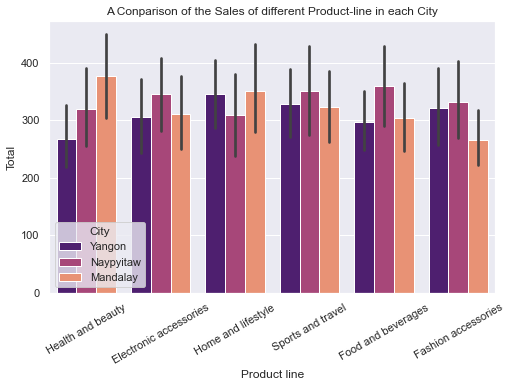

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x= 'Product line', y= 'Total', data= data, palette='magma', hue = "City").tick_params(axis= 'x', rotation =30)
plt.title("A Comparison of the Sales of different Product-line in each City");

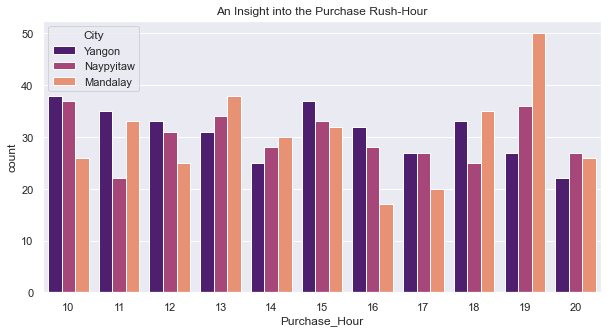

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x= "Purchase_Hour", data= data, hue= "City", palette="magma")
plt.title("An Insight into the Purchase Rush-Hour");

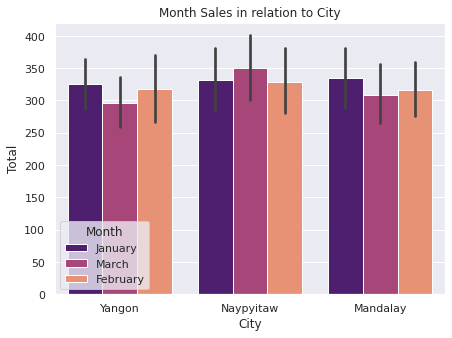

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(x = 'City',y = 'Total', data = data, palette = 'magma', hue ='Month')
plt.title('Month Sales in relation to City');

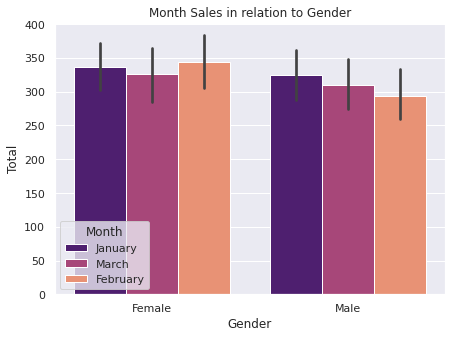

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(x = 'Gender',y = 'Total', data = data, palette = 'magma', hue ='Month')
plt.title('Month Sales in relation to Gender');

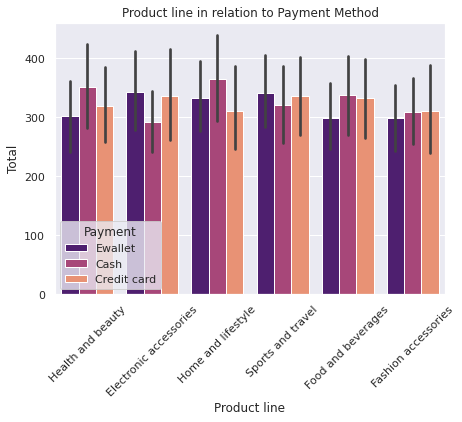

In [ ]:
plt.figure(figsize = (7,5))
sns.barplot(x = 'Product line',y = 'Total', data = data, palette = 'magma', hue ='Payment').tick_params(axis= 'x', rotation =45)
plt.title('Product line in relation to Payment Method');

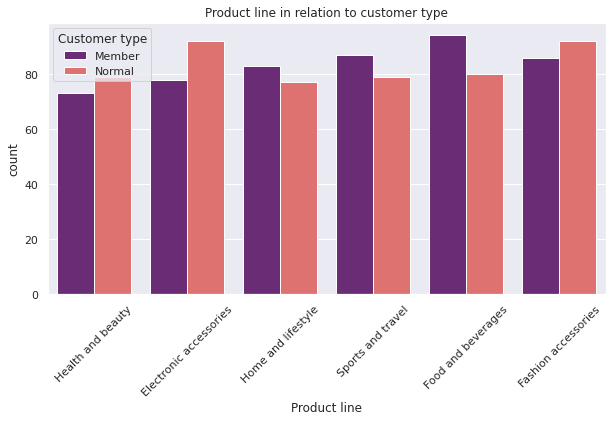

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x= "Product line", data= data, hue= "Customer type", palette="magma").tick_params(axis= 'x', rotation =45)
plt.title("Product line in relation to customer type");

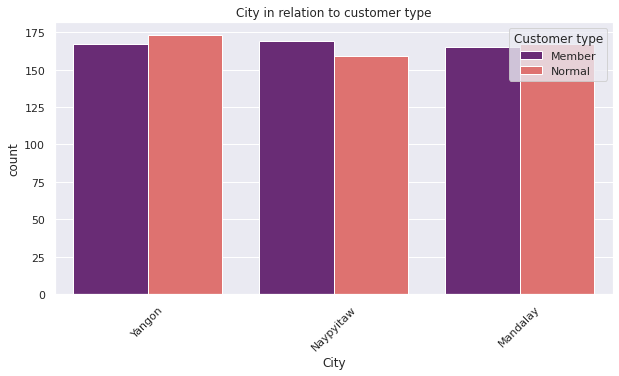

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x= "City", data= data, hue= "Customer type", palette="magma").tick_params(axis= 'x', rotation =45)
plt.title("City in relation to customer type");

### Now Let us Dive Deeper into the Performance in each Cities

### Cities Grouping

In [ ]:
branch_data= data.groupby("City")
Yangon = branch_data.get_group("Yangon")
Mandalay = branch_data.get_group("Mandalay")
Naypyitaw = branch_data.get_group("Naypyitaw")
# Naypyitaw.head()


Payment method in relation to City

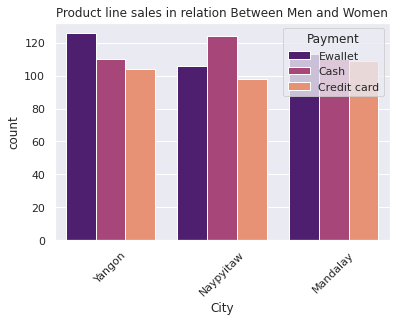

In [ ]:
sns.countplot(x= "City", data= data, hue= "Payment", palette="magma").tick_params(axis= 'x', rotation =45)
plt.title("Payment method in relation to City");

From the chart above, it shows us that Yangon do more of E-wallet, while Naypyitaw do more cash and Mandalay uses all. This shows us how to better plan the payment options more preferred in our different city. And we can see that, those paying with cash and Ewallet are more satisfied.

#### For Yangon

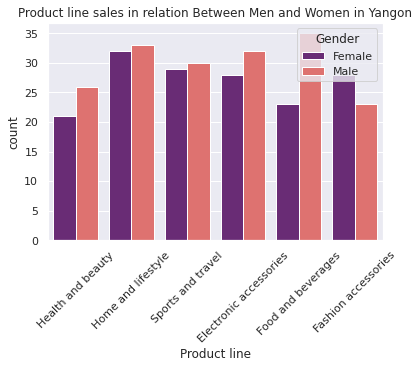

In [84]:
sns.countplot(x= "Product line", data= Yangon, hue= "Gender", palette="magma").tick_params(axis= 'x', rotation =45)
plt.title("Product line sales in relation Between Men and Women in Yangon");

Male has more purchase for all the product line except Fashion accessories. That means male do more of purchase in the supermarket. 

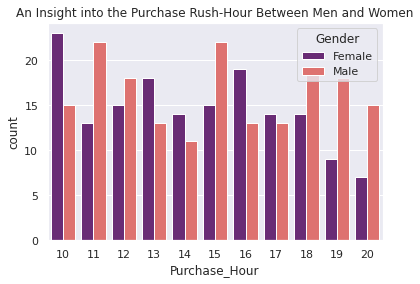

In [ ]:
sns.countplot(x= "Purchase_Hour", data= Yangon, hue= "Gender", palette="magma")
plt.title("An Insight into the Purchase Rush-Hour Between Men and Women");

In Yangon, men are quite available around 11am (Probably when those ones leave for work), also around 3pm and late evening between 6pm and 8pm (probably when returning from work) and so we can pay more attention to what men by more at those time (Especially food and beverages), while around 10am, 1pm and 4pm, we should plan more of our sales agent on goods like fashion accessories

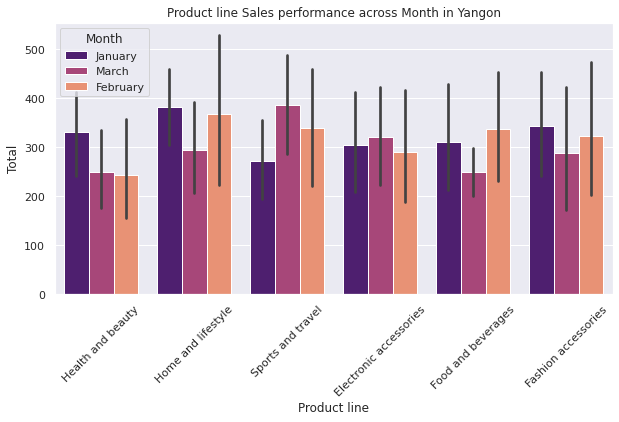

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Product line',y = 'Total', data = Yangon, palette = 'magma', hue ='Month').tick_params(axis= 'x', rotation =45)
plt.title('Product line Sales performance across Month in Yangon');

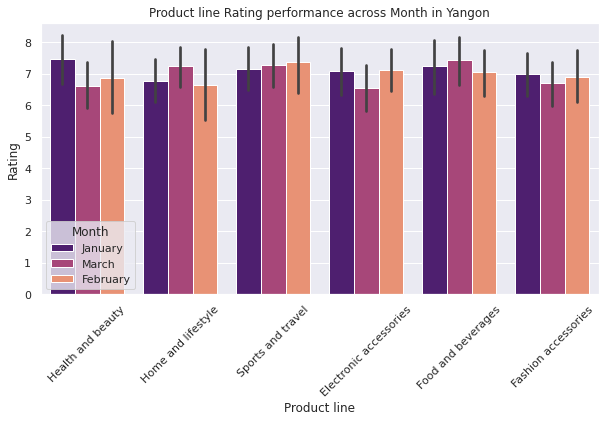

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Product line',y = 'Rating', data = Yangon, palette = 'magma', hue ='Month').tick_params(axis= 'x', rotation =45)
plt.title('Product line Rating performance across Month in Yangon');

we can see we marked a significant sales rise in 3  out of 6 product lines, as compared to the slight drop in the remaining 3. Also, there seem to be a very strong correlation between our average montly rating and our average monthly sale. Therefore, we might want to also look at things that could improve our  ratings (such as customer relation and quality of service). For goods under Health and beauty where we have significant sales drop with very slight drop in rating.

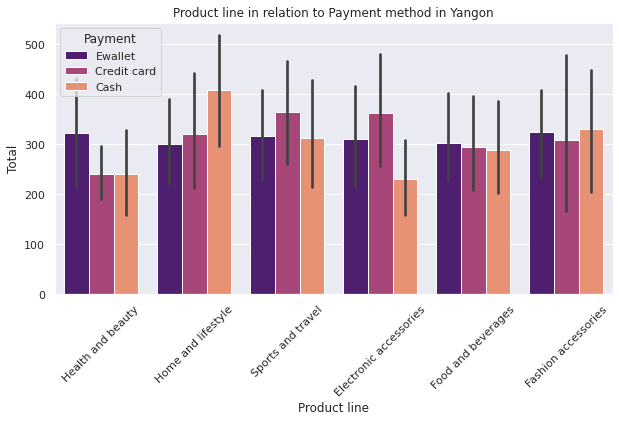

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Product line',y = 'Total', data = Yangon, palette = 'magma', hue ='Payment').tick_params(axis= 'x', rotation =45)
plt.title('Product line in relation to Payment method in Yangon');

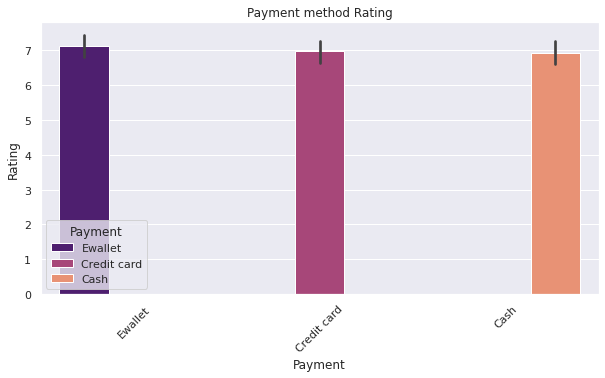

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Payment',y = 'Rating', data = Yangon, palette = 'magma', hue ='Payment').tick_params(axis= 'x', rotation =45)
plt.title('Payment method Rating');

The Charts above is to show us how to better plan the payment options closest to our different product line based on the measure of how customers prefer to pay for those comodities in time past. And we can see that, those paying with cast are least satisfied. so maybe we need more couting machine around Home & Lifestyle

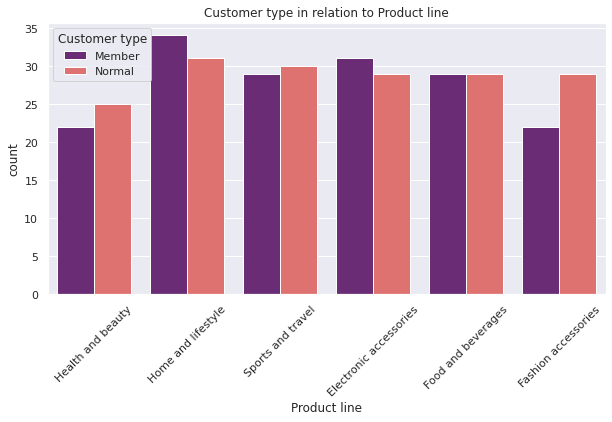

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x= "Product line", data= Yangon, hue= "Customer type", palette="magma").tick_params(axis= 'x', rotation =45)
plt.title("Customer type in relation to Product line");

In terms of customer being fan or loyalist, for Yangon, we might need to work at making more of our customers to loyalist (Member), especially along products in Health & beauty and Fashion. 

#### For Mandalay

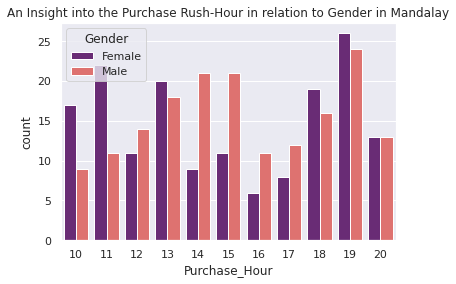

In [ ]:
sns.countplot(x= "Purchase_Hour", data= Mandalay, hue= "Gender", palette="magma")
plt.title("An Insight into the Purchase Rush-Hour in relation to Gender in Mandalay");

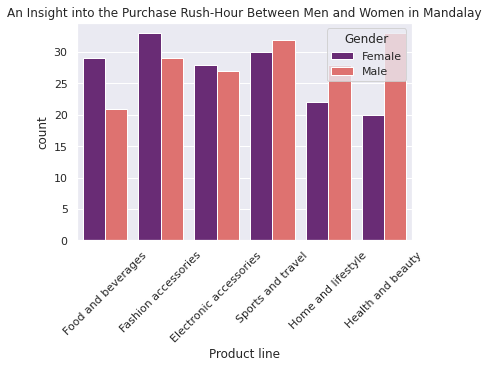

In [ ]:
sns.countplot(x= "Product line", data= Mandalay, hue= "Gender", palette="magma").tick_params(axis= 'x', rotation =45)
plt.title("An Insight into the Purchase Rush-Hour Between Men and Women in Mandalay");

Women are more prominent in the morning and evenings, while men are more prominent in the afternoon, therefore goods from food & beverages and Fashion Accessory should better prepare for customers. while others like Sports & travel, Home & lifestyle as well as Health and beauty should prepare for more sales in the afternoons and late evenings.

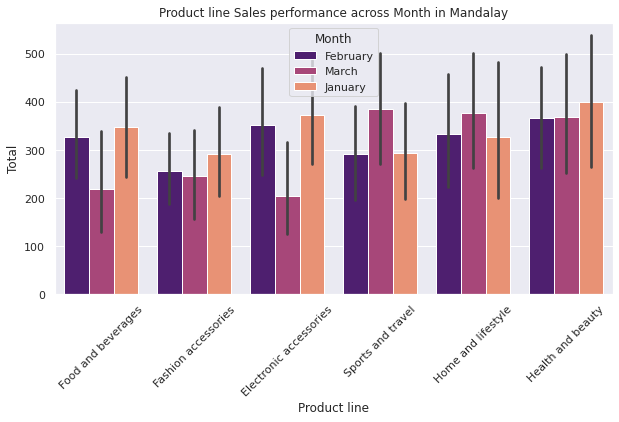

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Product line',y = 'Total', data = Mandalay, palette = 'magma', hue ='Month').tick_params(axis= 'x', rotation =45)
plt.title('Product line Sales performance across Month in Mandalay');

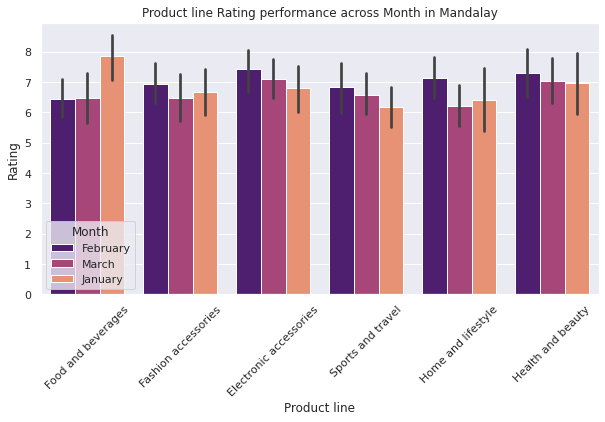

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Product line',y = 'Rating', data = Mandalay, palette = 'magma', hue ='Month').tick_params(axis= 'x', rotation =45)
plt.title('Product line Rating performance across Month in Mandalay');

Our Current marketing and sales strategy seem to be working for most commodity (aside from Sport & travel and Home & lifestyle) as we have been able to mark significant sales in recent month than others. However, it is important we look into why we are dropping in our ratings and how we can serve our customers better

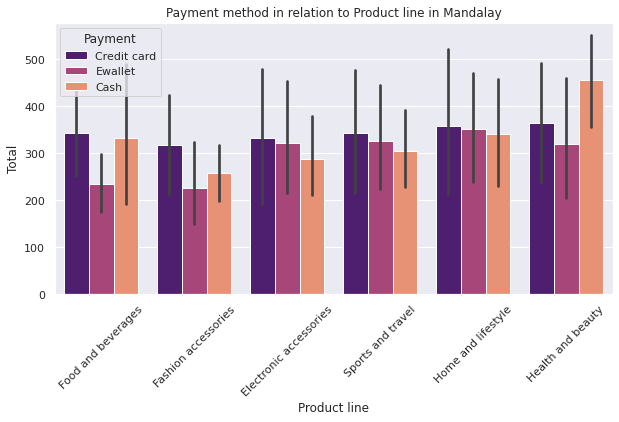

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Product line',y = 'Total', data = Mandalay, palette = 'magma', hue ='Payment').tick_params(axis= 'x', rotation =45)
plt.title('Payment method in relation to Product line in Mandalay');

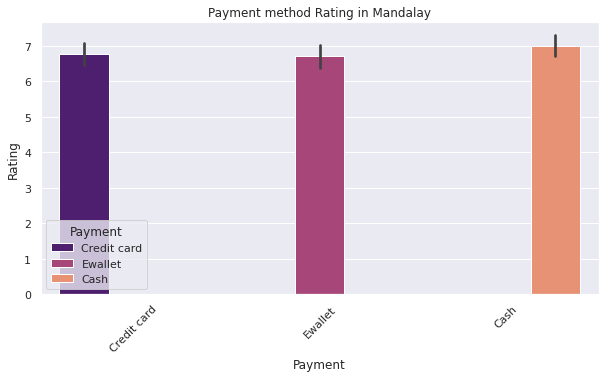

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Payment',y = 'Rating', data = Mandalay, palette = 'magma', hue ='Payment').tick_params(axis= 'x', rotation =45)
plt.title('Payment method Rating in Mandalay');

The Charts above is to shows us how to better plan the payment options closest to our different product line based on the measure of how customers prefer to pay for those comodities in time past. And we can see that, those paying with cash are more satisfied. 

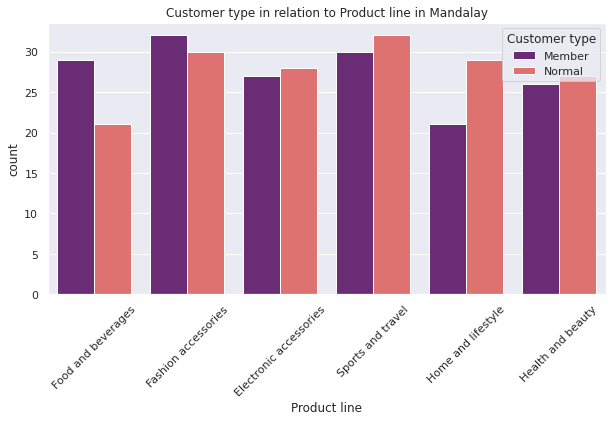

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x= "Product line", data= Mandalay, hue= "Customer type", palette="magma").tick_params(axis= 'x', rotation =45)
plt.title("Customer type in relation to Product line in Mandalay");

In terms of customer being fan or loyalist, for Mandalay, we might need to work at making more of our customers to loyalist (Member), especially along products in Home & Lifestyle, Electronics Accessories, Sports & Travel, and in Health & Beauty . 

#### For Naypyitaw

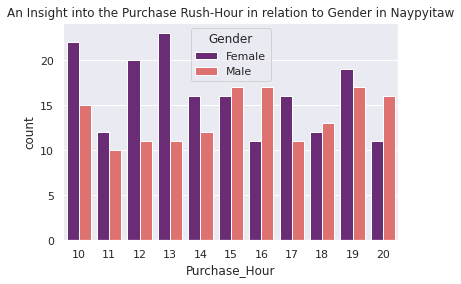

In [75]:
sns.countplot(x= "Purchase_Hour", data= Naypyitaw, hue= "Gender", palette="magma")
plt.title("An Insight into the Purchase Rush-Hour in relation to Gender in Naypyitaw");

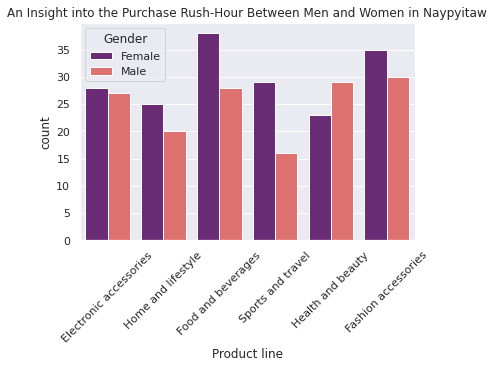

In [76]:
sns.countplot(x= "Product line", data= Naypyitaw, hue= "Gender", palette="magma").tick_params(axis= 'x', rotation =45)
plt.title("An Insight into the Purchase Rush-Hour Between Men and Women in Naypyitaw");

In Naypyitaw, women holds the most purchasing power, therefor i will advise that strategies be put up to try winning over their men to our supermarket

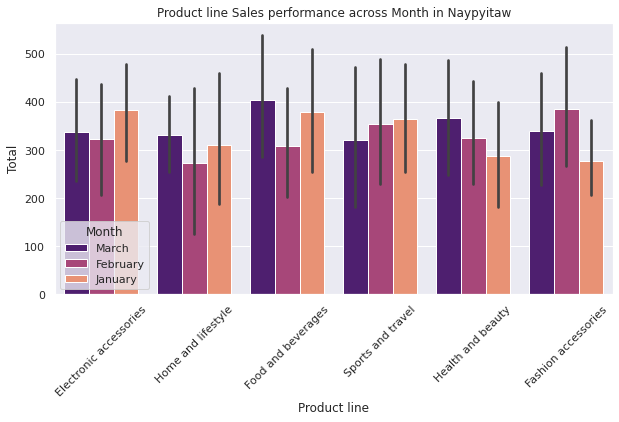

In [74]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Product line',y = 'Total', data = Naypyitaw, palette = 'magma', hue ='Month').tick_params(axis= 'x', rotation =45)
plt.title('Product line Sales performance across Month in Naypyitaw');

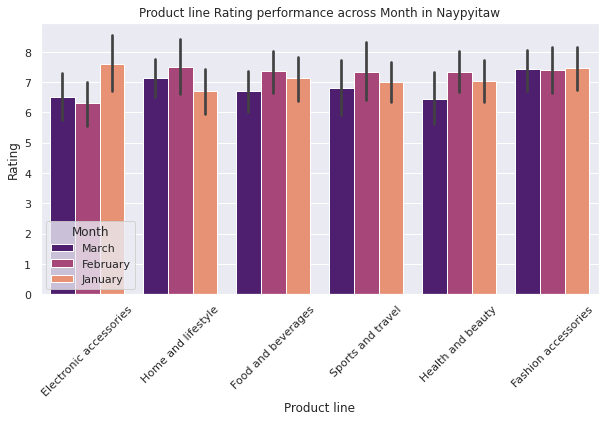

In [77]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Product line',y = 'Rating', data = Naypyitaw, palette = 'magma', hue ='Month').tick_params(axis= 'x', rotation =45)
plt.title('Product line Rating performance across Month in Naypyitaw');

In Naypyitaw, with an exception of Health & beauty and Fashion accessory, we can see we have made a fairly good marketing and sales strategy, and our productline rating is averagely on 7. However, we marked a rating drop in most product line and this calls for concern as this can impact subsequent sales.

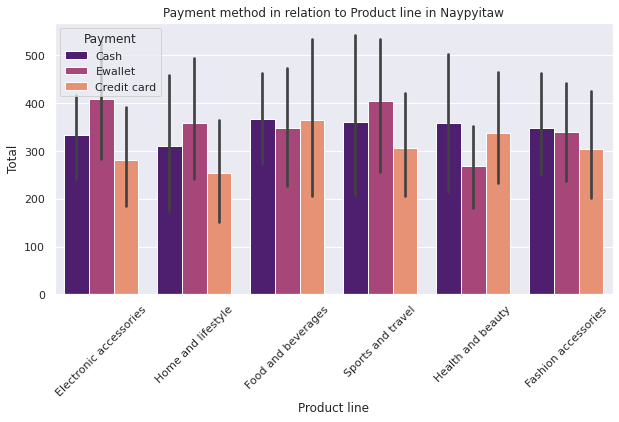

In [78]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Product line',y = 'Total', data = Naypyitaw, palette = 'magma', hue ='Payment').tick_params(axis= 'x', rotation =45)
plt.title('Payment method in relation to Product line in Naypyitaw');

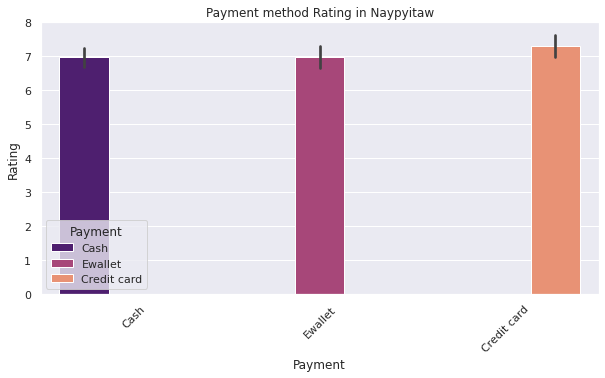

In [79]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Payment',y = 'Rating', data = Naypyitaw, palette = 'magma', hue ='Payment').tick_params(axis= 'x', rotation =45)
plt.title('Payment method Rating in Naypyitaw');

The Chats above is to shows us how to better plan the payment options closest to our different product line based on the measure of how customers prefer to pay for those comodities in time past. And we can see that, those paying with cash and Ewallet are least satisfied. so maybe we need more counting machines close to most of the product line and also expand the scope of their Ewallet scheme

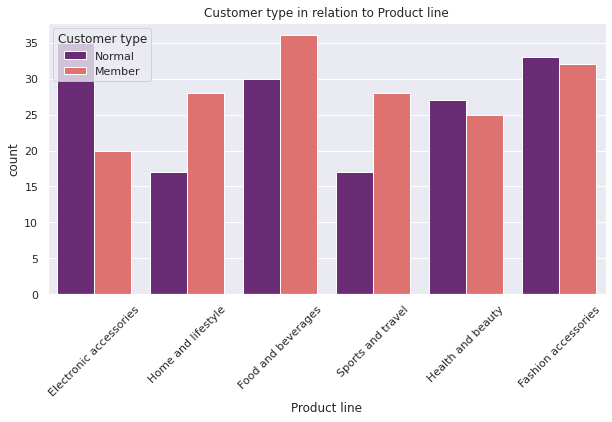

In [80]:
plt.figure(figsize = (10,5))
sns.countplot(x= "Product line", data= Naypyitaw, hue= "Customer type", palette="magma").tick_params(axis= 'x', rotation =45)
plt.title("Customer type in relation to Product line");

In terms of customer being fan or loyalist, for Naypytaw, we might need to work at making more of our customers to loyalist (Member), especially along products in Electronics accessories, Health & beauty and Sports & Travel . 

### Now Let us look at the overall performance of the 3 Cities 

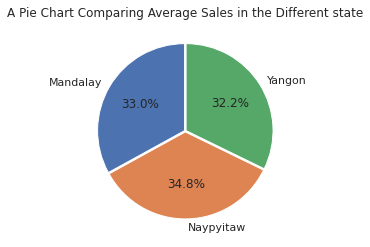

In [81]:
branch_sales= data.groupby("City")["Total"].mean()
explode = (0.01, 0.01, 0.01)
fig, ax = plt.subplots()
ax.pie(branch_sales, labels=branch_sales.index, autopct='%.1f%%', startangle=90, explode = explode)
plt.title("A Pie Chart Comparing Average Sales in the Different state");

In conclusion, generally the supermarket is  doing well internally, from our analysis the comparison between different branch sales, different products line and cities sales shows that the supermarket is not depending on only one branch or product line to sustain its business.

However getting more data on average supermarket sales within our dataset region, will help us do more analysis on the supermarket optimum profitability and growth.